# Supply Chain, Cost Optimization, Regression Modeling

## Project Goals
### (i) Raise the awareness about costs in supply chain route assignments
### (ii) Quantify the marginal contribution of warehouse/storage capacities
### (iii) Identify warehouses with significant marginal, average and total costs

## 1. Data

In [1]:
import pandas as pd

# Unit cost per warehouse in dollars
Unit_Cost = pd.read_table('Unit_Cost.txt', header = None)
Unit_Cost.rename(columns = {0: 'warehouse', 1: 'unit_cost'}, inplace = True)

# Daily capacity of warehouses in number of orders
Daily_Capacity = pd.read_table('Daily_Capacity.txt', header = None)
Daily_Capacity.rename(columns = {0: 'warehouse', 1: 'daily_capacity'}, inplace = True)

# Merge dataframes
df = Unit_Cost.merge(Daily_Capacity, left_on = 'warehouse', right_on = 'warehouse')
df.head()

,warehouse,unit_cost,daily_capacity
0,PLANT15,1.41506,11
1,PLANT17,0.42895,8
2,PLANT18,2.03625,111
3,PLANT05,0.48814,385
4,PLANT02,0.47750,138


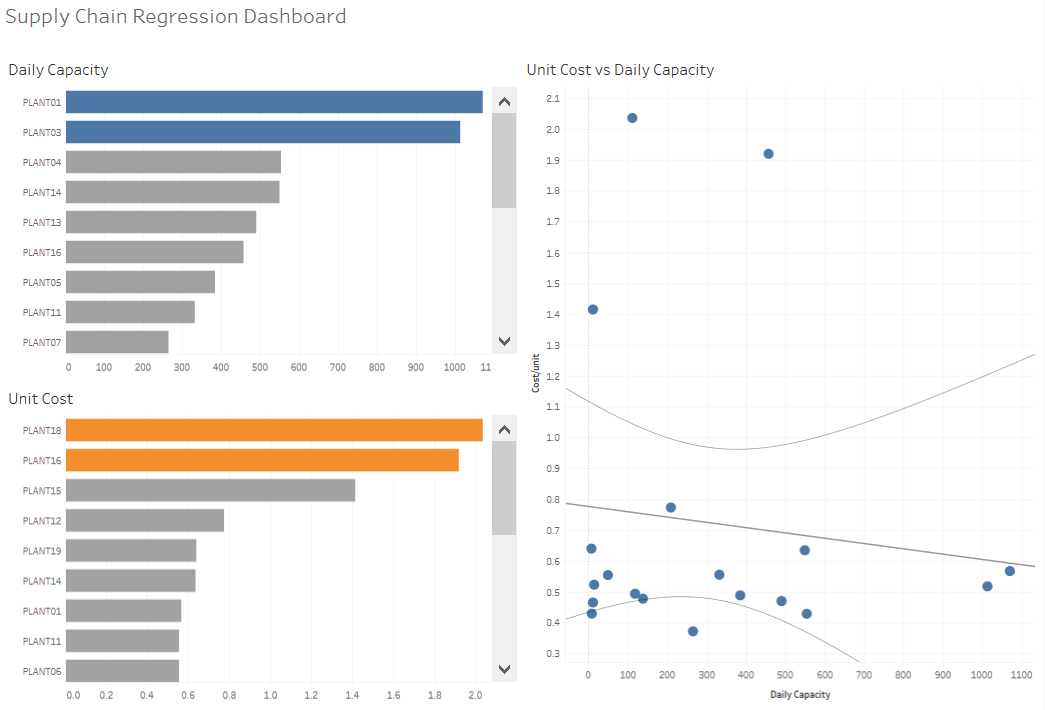

In [10]:
# Supply Chain Regression Dashboard

# Link
# https://public.tableau.com/profile/andrija.mihoci7725#!/vizhome/SupplyChainRegressionDashboard/SupplyChainRegressionDashboard)

from IPython.display import Image

Image('supply_chain_regression_dashboard.png')

## 2. Regression Modeling

### 2.1 Response and Features

In [2]:
# Set the Response Variable (unit cost in dollars)
# Set the Features (daily capacity of a warehouse in number of orders)

import numpy as np

y = df['unit_cost'].to_numpy()
y = y.reshape(y.shape[0], 1)

x = df['daily_capacity'].to_numpy()
x = x.reshape(x.shape[0], 1)

### 2.2 Model Fit

In [3]:
from sklearn import linear_model

regr = linear_model.LinearRegression().fit(x, y)
print('Estimated Parameter (daily_capacity)', regr.coef_[0][0].round(5))
print('Estimated Parameter (constant)       ', regr.intercept_[0].round(5))

Estimated Parameter (daily_capacity) -0.00017
Estimated Parameter (constant)        0.77647


### 2.3 Fitted Unit Costs and Innovations

In [4]:
# Fitted Unit Costs per Warehouse given Daily Capacity
y_hat = regr.predict(x)

In [5]:
# Estimated Innovations per Wahehouse in Dollars per Unit
e_hat = y - y_hat

## 3. Results

## Project Results
### (i) Raise the awareness about costs in supply chain routing

#### From the analyzed warehouses, there were three groups identified
#### Group 1: warehouses with very low unit costs and large capacities
#### Group 2: warehouses with very high unit costs and average capacities
#### Group 3: other warehouses with unique cost contributions

### (ii) Quantify the marginal contribution of warehouse/storage capacities

#### With increasing capacity of a warehouse, on average the unit costs decrease by 0.00017 dollars
#### An estimated level of unit costs with zero capacity equals 0.77 dollars

### (iii) Identify warehouses with significant marginal, average and total costs

#### Group 1: The warehouses 01 and 03 look promising on large scale, caution while modeling the total costs of route assignment
#### Group 2: In assiging routes, pay attention to warehouses 16 and 18. These warehouses have large unit costs and average capacity and thus should be taken carefully in the route assignement
#### Group 3: Warehouses that have mostly acceptable/average and below average levels of unit costs in relation to the capacity
